<a href="https://colab.research.google.com/github/RuthKassahun/Skin-Lesion-Classification/blob/main/Segment_dark_corners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

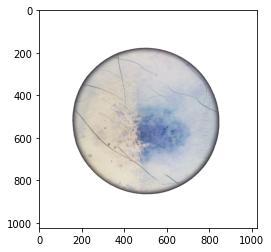

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# load image as grayscale
img = cv2.imread('/content/nev00002.jpg')
if(img[0:10,0:10,:] == 0).any() and (img[0:10,0:10,:]<=20).any():
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # threshold input image
    mask = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]

    # optional morphology to clean up small spots
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # put mask into alpha channel of image
    result = np.dstack((img, mask))

    # save resulting masked image
    cv2.imwrite('20202.png', result)

    # display result, though it won't show transparency
    #plt.imshow(mask)
    plt.imshow(result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
  print("condition haven't met")